# Metrix Derivations for TOD

In [1]:
import cv2
import json
import random
from PIL import Image
from matplotlib import pyplot as plt
from pycocotools.coco import COCO

In [2]:
img_dir = 'metrix/images/'

with open('metrix/org_anno.json') as o_file:
    org_coco = json.loads(o_file.read())
    o_file.close()

with open('metrix/lb_anno.json') as l_file:
    lb_coco = json.loads(l_file.read())
    l_file.close()

In [3]:
print(org_coco.keys(), lb_coco.keys(), sep='\n')

dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])
dict_keys(['images', 'categories', 'annotations'])


In [4]:
print("Original_COCO_Info: ", 'images: ' + str(len(org_coco['images'])), 'annotations: ' + str(len(org_coco['annotations'])), 'categories: '+ str(len(org_coco['categories'])), sep='\n')
print('\n')
print("Labelbees_COCO_Info: ", 'images: ' + str(len(lb_coco['images'])), 'annotations: ' + str(len(lb_coco['annotations'])), 'categories: '+ str(len(lb_coco['categories'])), sep='\n')

Original_COCO_Info: 
images: 1500
annotations: 4784
categories: 60


Labelbees_COCO_Info: 
images: 1049
annotations: 3757
categories: 58


In [5]:
org_data = COCO('metrix/org_anno.json')
lb_data = COCO('metrix/lb_anno.json')

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.22s)
creating index...
index created!


In [6]:
org_catids = org_data.getCatIds()
print("Original Categories:", org_catids, sep='\n')

print('\n')

lb_catids = lb_data.getCatIds()
print("Labelbees Categories:", lb_catids, sep='\n')

Original Categories:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


Labelbees Categories:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]


In [7]:
org_cats = org_data.loadCats(org_data.getCatIds())
o_cat_list = [cat['name'].lower() for cat in org_cats]
print(len(o_cat_list), o_cat_list, sep='\n')

lb_cats = lb_data.loadCats(lb_data.getCatIds())
l_cat_list = [cat['name'].lower() for cat in lb_cats]
print('\n', len(l_cat_list), l_cat_list, sep='\n')

60
['aluminium foil', 'battery', 'aluminium blister pack', 'carded blister pack', 'other plastic bottle', 'clear plastic bottle', 'glass bottle', 'plastic bottle cap', 'metal bottle cap', 'broken glass', 'food can', 'aerosol', 'drink can', 'toilet tube', 'other carton', 'egg carton', 'drink carton', 'corrugated carton', 'meal carton', 'pizza box', 'paper cup', 'disposable plastic cup', 'foam cup', 'glass cup', 'other plastic cup', 'food waste', 'glass jar', 'plastic lid', 'metal lid', 'other plastic', 'magazine paper', 'tissues', 'wrapping paper', 'normal paper', 'paper bag', 'plastified paper bag', 'plastic film', 'six pack rings', 'garbage bag', 'other plastic wrapper', 'single-use carrier bag', 'polypropylene bag', 'crisp packet', 'spread tub', 'tupperware', 'disposable food container', 'foam food container', 'other plastic container', 'plastic glooves', 'plastic utensils', 'pop tab', 'rope & strings', 'scrap metal', 'shoe', 'squeezable tube', 'plastic straw', 'paper straw', 'styrof

In [8]:
print("Missed Categories in Labelbees Dataset:")
for c in o_cat_list:
    if c not in l_cat_list:
        print(c)

Missed Categories in Labelbees Dataset:
aluminium foil
aluminium blister pack
spread tub
tupperware
plastic glooves
rope & strings


In [9]:
org_anns = org_data.getAnnIds()
org_imgs = org_data.getImgIds()
print("Original Images: " + str(len(org_imgs)), "Original Annotations: " + str(len(org_anns)), sep='\n')

lb_anns = lb_data.getAnnIds()
lb_imgs = lb_data.getImgIds()
print('\n', "Original Images: " + str(len(lb_imgs)), "Labelbees Annotations: " + str(len(lb_anns)), sep='\n')

Original Images: 1500
Original Annotations: 4784


Original Images: 1049
Labelbees Annotations: 3757


In [11]:
org_image_data = org_data.loadImgs(org_data.getImgIds())
lb_image_data = lb_data.loadImgs(lb_data.getImgIds())
image_list = []
for image in org_image_data:
    if '/' not in image['file_name']:
        image_list.append(image['file_name'])
print(len(image_list), len(lb_image_data))

1043 1049


9d4ea.JPG


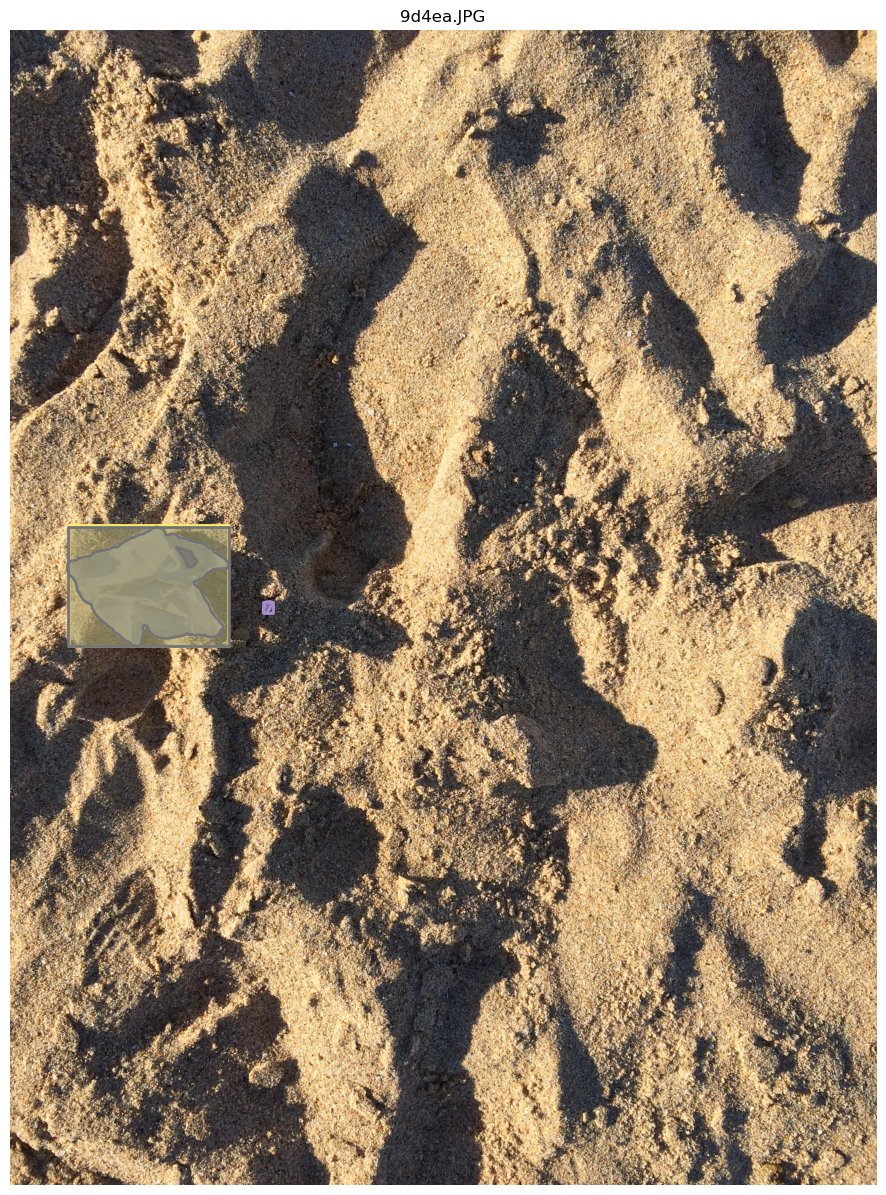

In [16]:
rand_img = random.choice(image_list)

for image in org_image_data:
    if image['file_name'] == rand_img:
        ogid = image['id']

for image in lb_image_data:
    if image['file_name'] == rand_img:
        lbid = image['id']

oa_ids = org_data.getAnnIds(imgIds=ogid)
la_ids = lb_data.getAnnIds(imgIds=lbid)

org_anno = org_data.loadAnns(oa_ids)
lb_anno = lb_data.loadAnns(la_ids)
dis_image = cv2.imread(img_dir + rand_img)
dis_image = cv2.cvtColor(dis_image, cv2.COLOR_BGR2RGB)
print(rand_img)
plt.figure(figsize=(15,15))
plt.axis('off')
plt.title(rand_img)
plt.imshow(dis_image)
org_data.showAnns(org_anno, draw_bbox=True)
lb_data.showAnns(lb_anno, draw_bbox=True)